In [2]:
pip install pandas matplotlib seaborn scikit-learn


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\Projects\EbixPro_AI_bot\Analysis\Best timing recomandation on social media platform\sample_purchase_data.csv")  # Replace with the actual file path

# Display first few rows
print(data.head())


  order_id customer_id product_category  quantity   price  \
0     O001        C042        Furniture         1  194.33   
1     O002        C002             Toys         3  187.67   
2     O003        C031          Fashion         5  108.86   
3     O004        C026          Fashion         5  150.13   
4     O005        C045        Furniture         4  464.22   

    purchase_timestamp customer_age customer_gender       location  \
0  2021-02-06 18:00:00        25-34           Other  San Francisco   
1  2023-04-23 22:49:00        45-54            Male        Chicago   
2  2021-10-13 04:17:00          55+          Female        Houston   
3  2024-12-24 21:47:00          55+            Male  San Francisco   
4  2020-05-26 11:10:00        25-34          Female        Houston   

   marketing_channel engagement_time  
0                SMS        12:27 PM  
1                SMS        12:40 AM  
2  Push Notification        04:36 PM  
3  Push Notification        03:39 PM  
4       Social Me

In [4]:
data.head()

,order_id,customer_id,product_category,quantity,price,purchase_timestamp,customer_age,customer_gender,location,marketing_channel,engagement_time
0,O001,C042,Furniture,1,194.33,2021-02-06 18:00:00,25-34,Other,San Francisco,SMS,12:27 PM
1,O002,C002,Toys,3,187.67,2023-04-23 22:49:00,45-54,Male,Chicago,SMS,12:40 AM
2,O003,C031,Fashion,5,108.86,2021-10-13 04:17:00,55+,Female,Houston,Push Notification,04:36 PM
3,O004,C026,Fashion,5,150.13,2024-12-24 21:47:00,55+,Male,San Francisco,Push Notification,03:39 PM
4,O005,C045,Furniture,4,464.22,2020-05-26 11:10:00,25-34,Female,Houston,Social Media,06:22 PM


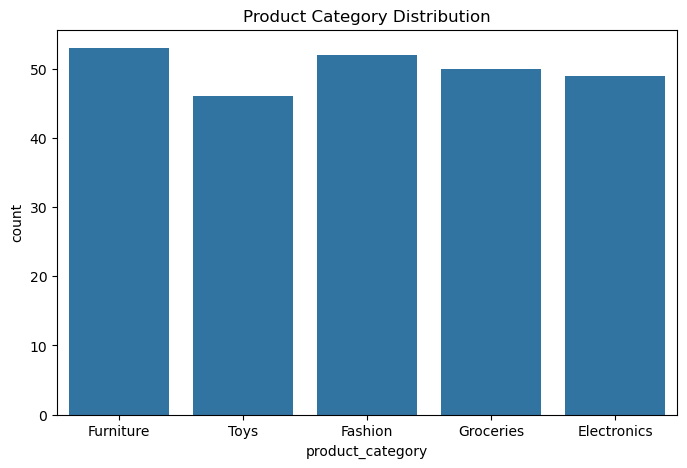

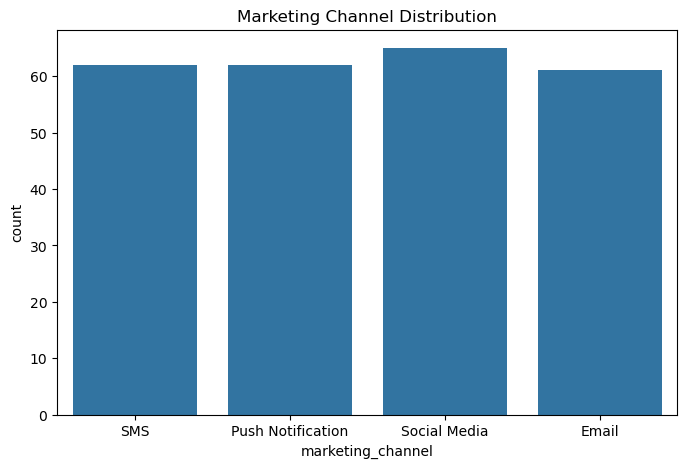

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for product categories
plt.figure(figsize=(8, 5))
sns.countplot(x='product_category', data=data)
plt.title('Product Category Distribution')
plt.show()

# Countplot for marketing channels
plt.figure(figsize=(8, 5))
sns.countplot(x='marketing_channel', data=data)
plt.title('Marketing Channel Distribution')
plt.show()


In [6]:
# Convert timestamp to datetime
data['purchase_timestamp'] = pd.to_datetime(data['purchase_timestamp'])
data['engagement_time'] = pd.to_datetime(data['engagement_time'], format='%I:%M %p').dt.time


In [7]:
data['purchase_hour'] = data['purchase_timestamp'].dt.hour
data['purchase_day'] = data['purchase_timestamp'].dt.day
data['purchase_month'] = data['purchase_timestamp'].dt.month
data['purchase_weekday'] = data['purchase_timestamp'].dt.weekday  # 0=Monday, 6=Sunday


In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder = LabelEncoder()
data['product_category'] = encoder.fit_transform(data['product_category'])
data['customer_age'] = encoder.fit_transform(data['customer_age'])
data['customer_gender'] = encoder.fit_transform(data['customer_gender'])
data['location'] = encoder.fit_transform(data['location'])
data['marketing_channel'] = encoder.fit_transform(data['marketing_channel'])


In [9]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values if required
data.fillna(method='ffill', inplace=True)


order_id              0
customer_id           0
product_category      0
quantity              0
price                 0
purchase_timestamp    0
customer_age          0
customer_gender       0
location              0
marketing_channel     0
engagement_time       0
purchase_hour         0
purchase_day          0
purchase_month        0
purchase_weekday      0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_18888\3997165385.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


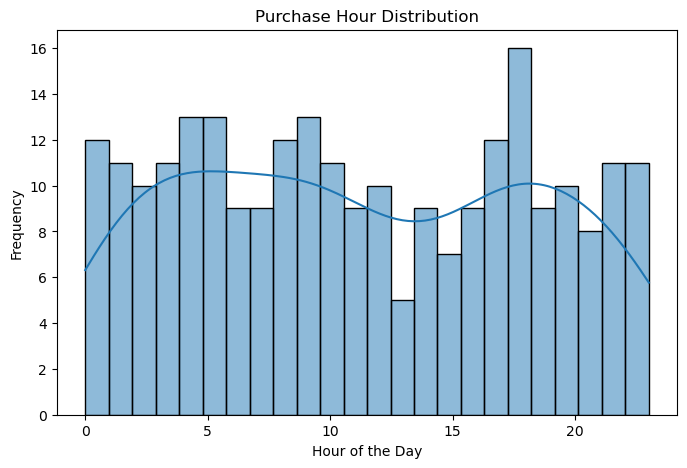

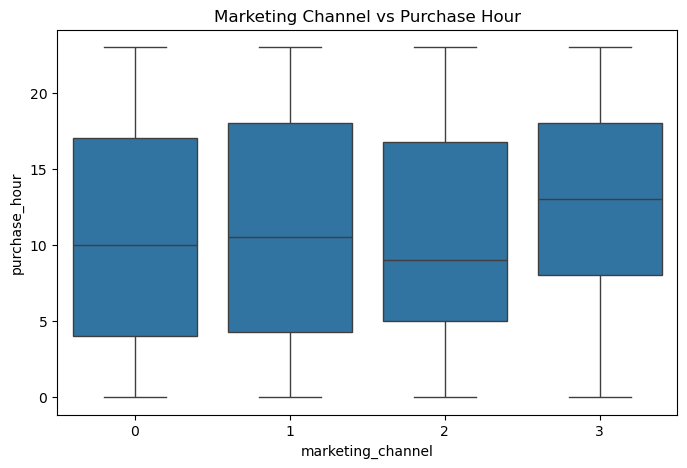

In [10]:
# Distribution of purchase hours
plt.figure(figsize=(8, 5))
sns.histplot(data['purchase_hour'], bins=24, kde=True)
plt.title('Purchase Hour Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.show()

# Engagement time vs Marketing channel
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['marketing_channel'], y=data['purchase_hour'])
plt.title('Marketing Channel vs Purchase Hour')
plt.show()


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            250 non-null    object        
 1   customer_id         250 non-null    object        
 2   product_category    250 non-null    int32         
 3   quantity            250 non-null    int64         
 4   price               250 non-null    float64       
 5   purchase_timestamp  250 non-null    datetime64[ns]
 6   customer_age        250 non-null    int32         
 7   customer_gender     250 non-null    int32         
 8   location            250 non-null    int32         
 9   marketing_channel   250 non-null    int32         
 10  engagement_time     250 non-null    object        
 11  purchase_hour       250 non-null    int32         
 12  purchase_day        250 non-null    int32         
 13  purchase_month      250 non-null    int32         

In [13]:
# Convert 'engagement_time' from object to datetime format (24-hour format)
data['engagement_time'] = pd.to_datetime(data['engagement_time'], format='%H:%M:%S').dt.time


In [14]:
# Extract hour and minute from engagement_time
data['engagement_hour'] = pd.to_datetime(data['engagement_time'], format='%H:%M:%S').dt.hour
data['engagement_minute'] = pd.to_datetime(data['engagement_time'], format='%H:%M:%S').dt.minute


In [15]:
print(data[['engagement_time', 'engagement_hour', 'engagement_minute']].head())
print(data.info())


  engagement_time  engagement_hour  engagement_minute
0        12:27:00               12                 27
1        00:40:00                0                 40
2        16:36:00               16                 36
3        15:39:00               15                 39
4        18:22:00               18                 22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            250 non-null    object        
 1   customer_id         250 non-null    object        
 2   product_category    250 non-null    int32         
 3   quantity            250 non-null    int64         
 4   price               250 non-null    float64       
 5   purchase_timestamp  250 non-null    datetime64[ns]
 6   customer_age        250 non-null    int32         
 7   customer_gender     250 non-null    int32         
 8   locati

In [17]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int32', 'int64'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                   product_category  quantity     price  customer_age  \
product_category           1.000000  0.127251  0.116806      0.040345   
quantity                   0.127251  1.000000  0.066381      0.094959   
price                      0.116806  0.066381  1.000000      0.047139   
customer_age               0.040345  0.094959  0.047139      1.000000   
customer_gender           -0.068169  0.028051  0.000850     -0.000734   
location                  -0.019500 -0.008398  0.015673     -0.000830   
marketing_channel          0.023621 -0.017012  0.028668     -0.031718   
purchase_hour              0.026442  0.071015 -0.003002      0.004039   
purchase_day               0.048545  0.067054  0.057353      0.118801   
purchase_month            -0.076360  0.056459 -0.023501     -0.030266   
purchase_weekday           0.000500  0.061059 -0.027188     -0.050484   
engagement_hour           -0.011443 -0.027204  0.025424     -0.089789   
engagement_minute          0.127268  0.035590  0.09

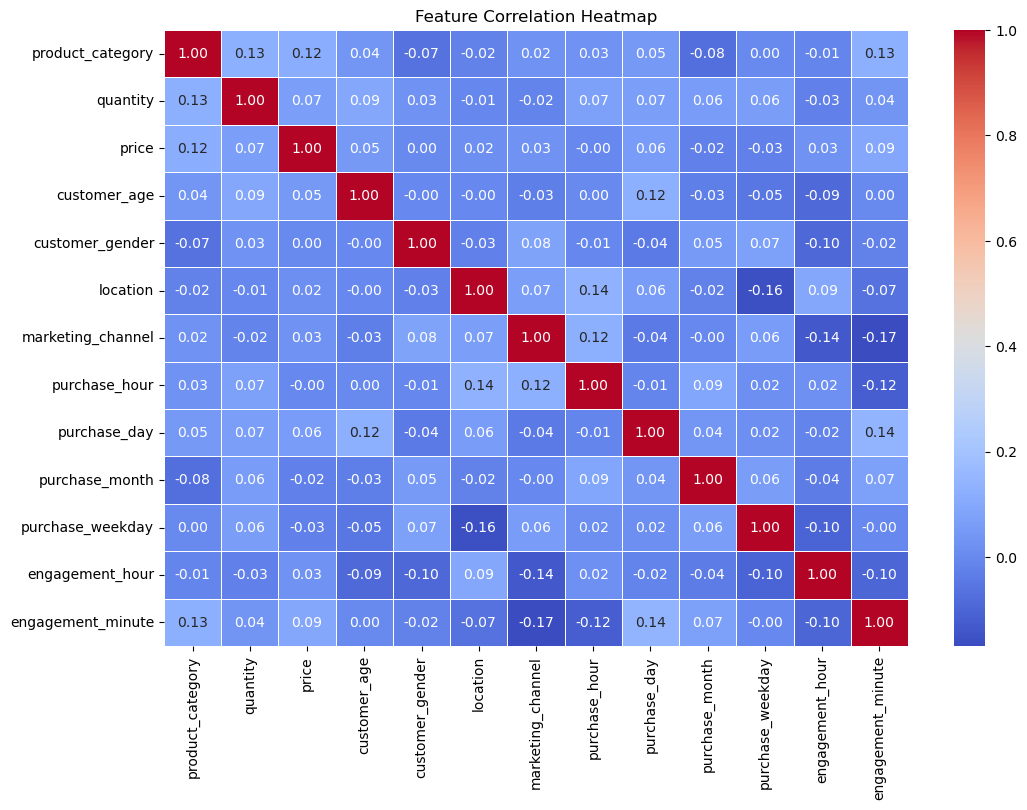

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [31]:
data['purchase_hour'] = data['purchase_timestamp'].dt.hour
data['purchase_day'] = data['purchase_timestamp'].dt.day
data['purchase_weekday'] = data['purchase_timestamp'].dt.weekday
data['purchase_month'] = data['purchase_timestamp'].dt.month


In [33]:
# Convert 'engagement_time' to datetime, including seconds
data['engagement_time'] = pd.to_datetime(data['engagement_time'], format='%H:%M:%S')

# Extract total engagement minutes (hours * 60 + minutes)
data['engagement_minutes'] = data['engagement_time'].dt.hour * 60 + data['engagement_time'].dt.minute


In [34]:
data = pd.get_dummies(data, columns=['product_category', 'customer_gender', 'location', 'marketing_channel'])


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you are predicting `purchase_hour` as the best time
X = data.drop(columns=['purchase_timestamp', 'order_id', 'purchase_hour'])  # Drop irrelevant columns
y = data['purchase_hour']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')


ValueError: could not convert string to float: 'C036'

In [19]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoder = LabelEncoder()

categorical_cols = ['product_category', 'customer_gender', 'location', 'marketing_channel']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])


In [20]:
y = data['engagement_hour']  # Target variable
X = data.drop(columns=['order_id', 'customer_id', 'engagement_time', 'engagement_hour'])  # Features


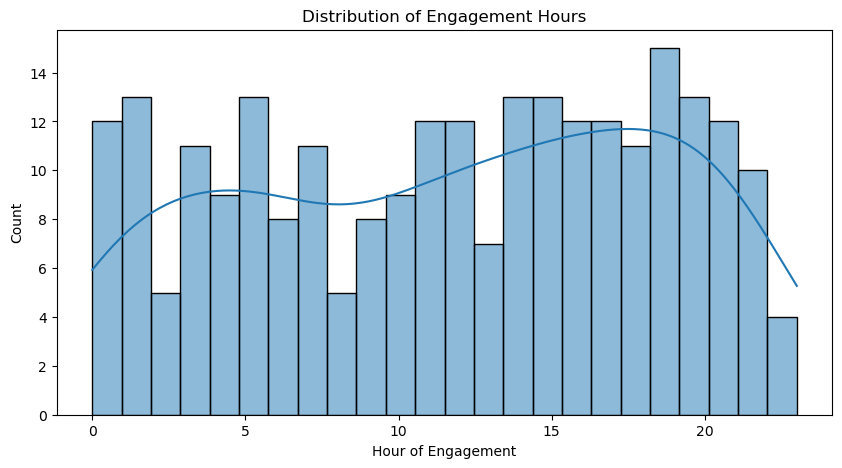

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data['engagement_hour'], bins=24, kde=True)
plt.title('Distribution of Engagement Hours')
plt.xlabel('Hour of Engagement')
plt.ylabel('Count')
plt.show()


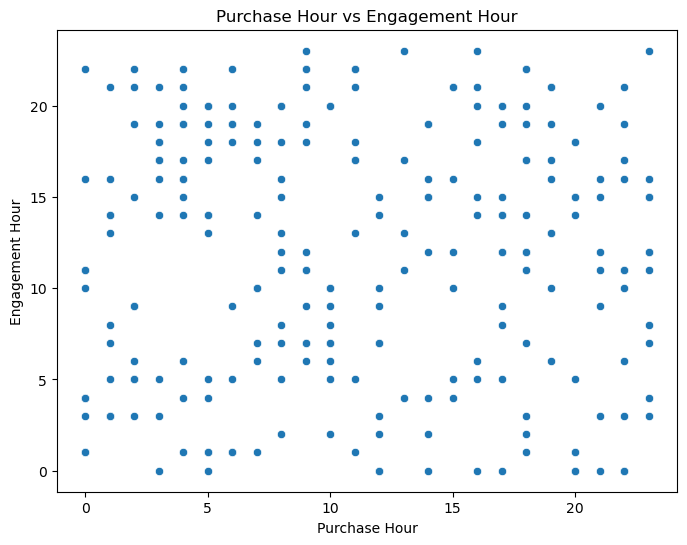

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['purchase_hour'], y=data['engagement_hour'])
plt.title('Purchase Hour vs Engagement Hour')
plt.xlabel('Purchase Hour')
plt.ylabel('Engagement Hour')
plt.show()


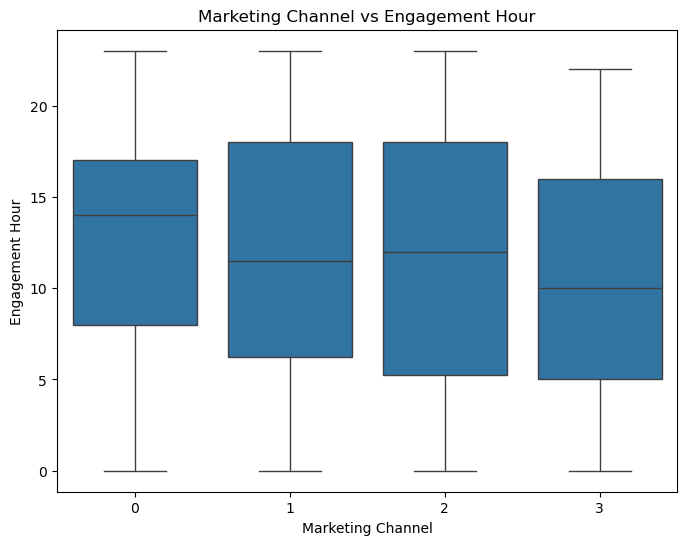

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['marketing_channel'], y=data['engagement_hour'])
plt.title('Marketing Channel vs Engagement Hour')
plt.xlabel('Marketing Channel')
plt.ylabel('Engagement Hour')
plt.show()


In [25]:
# Exclude the datetime columns from X
X_numeric = X.select_dtypes(exclude=['datetime64[ns]'])

# Apply scaling to the remaining numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Now X_scaled contains the scaled values of numeric columns


In [28]:
import pandas as pd
import numpy as np
# Example: Convert datetime columns to Unix timestamps (if relevant)
X['purchase_timestamp'] = X['purchase_timestamp'].astype(np.int64) // 10**9  # Unix timestamp in seconds

# Now you can scale the entire dataset including datetime columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now X_scaled contains the scaled values of all columns


In [30]:
from sklearn.model_selection import train_test_split

# Define your target column (assuming you want to predict 'engagement_hour')
target_column = 'engagement_hour'  # Target column is now 'engagement_hour'

# Separate the target and features
y = data[target_column]  # Target column (engagement_hour)
X = data.drop(columns=[target_column])  # Drop the target column from features

# Now, you have X (features) and y (target), and you can split them
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, if you want to scale the features:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, X_train_scaled, X_test_scaled, y_train, and y_test are ready to be used


ValueError: could not convert string to float: 'O133'